<center><h1>Last_First_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>
<center><font size="3"> Zachary J Henning</font></center>

### (a) Download Data

Package imports

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn 
import scipy

Get the Vertebral Column Data Set

In [3]:
#data downloaded manually
#import downloaded data as dataframe
path = "/Users/zachary/Documents/Grad School/DSCI_552/02 - data/HW1/vertebral+column/column_2C.dat"

df = pd.read_csv(path, delimiter='\s')
col_names = ['p_incidence', 
             'p_tilt', 
             'll_angle', 
             's_slope', 
             'p_radius', 
             'degree_spondylolisthesis',
             'Class']
#add column names to dataframe and print head to check
df.columns = col_names
#changing the class to binary classification
bin_class = {'AB':1, 'NO':0}
df.Class = [bin_class[item] for item in df.Class]
df.head()

/var/folders/l2/cy38m1l53pz09nlcj3y7_k5m0000gp/T/ipykernel_11202/1965225146.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, delimiter='\s')


,p_incidence,p_tilt,ll_angle,s_slope,p_radius,degree_spondylolisthesis,Class
0,39.06,10.06,25.02,29.00,114.41,4.56,1
1,68.83,22.22,50.09,46.61,105.99,-3.53,1
2,69.30,24.65,44.31,44.64,101.87,11.21,1
3,49.71,9.65,28.32,40.06,108.17,7.92,1
4,40.25,13.92,25.12,26.33,130.33,2.23,1


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

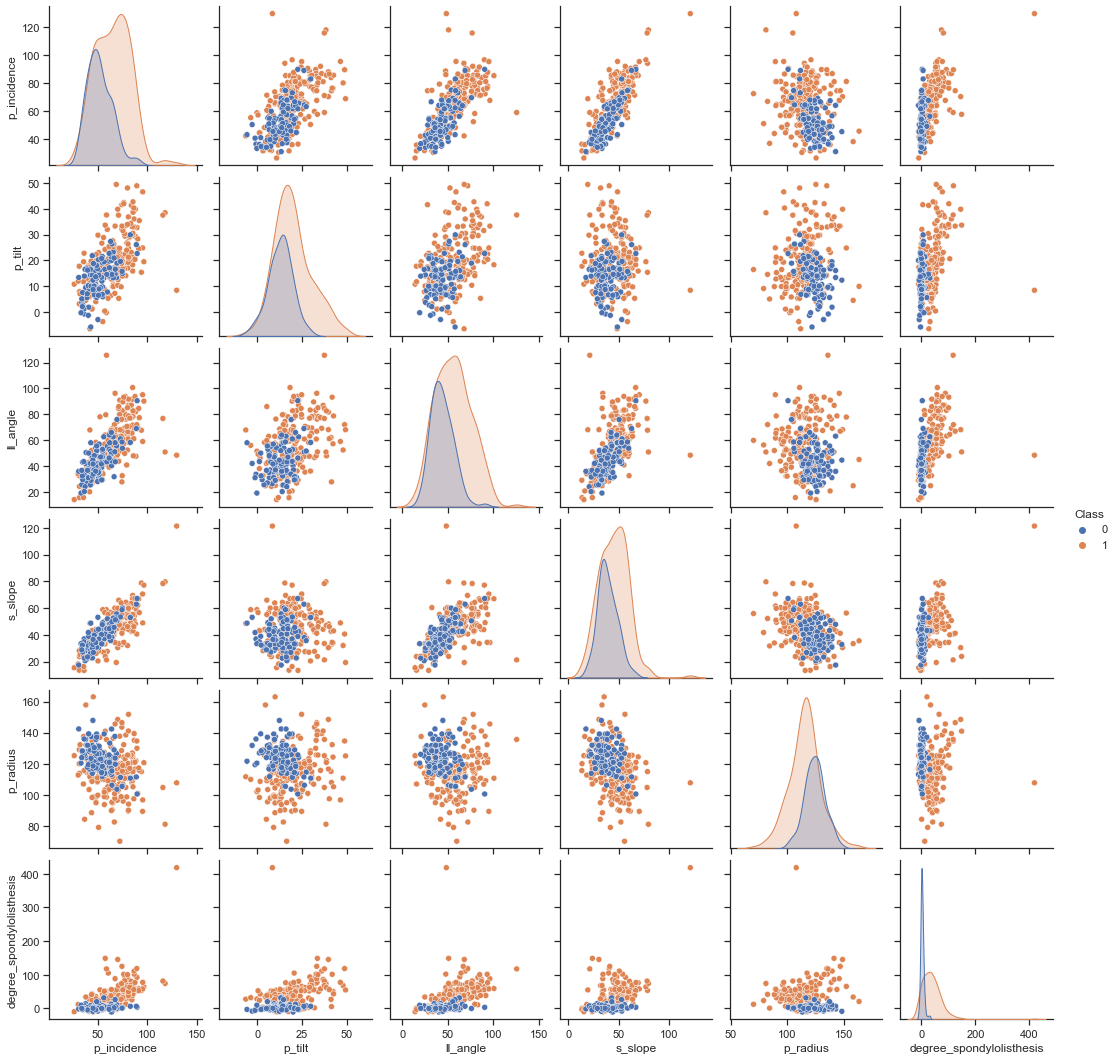

In [4]:
sns.set_theme(style="ticks")
m = sns.pairplot(df, hue="Class")


#### ii. Boxplots

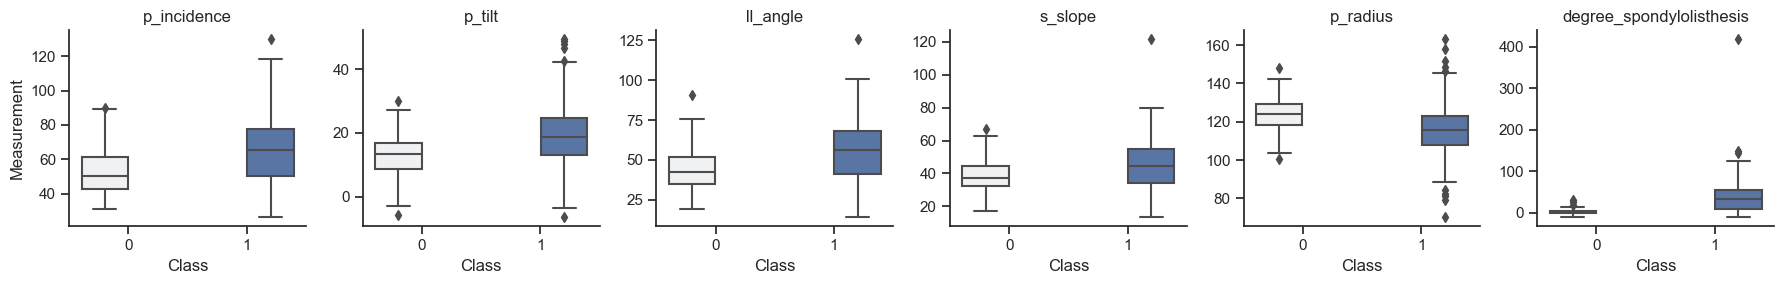

In [6]:
#Create a facet grid of boxplots for all independent vairalbs and color code by Class (NO = 0, AB = 1)
g = sns.FacetGrid(df.melt(id_vars='Class'), col='variable', sharey=False)
g.map_dataframe(sns.boxplot, x='Class', y='value', hue='Class')
g.set_axis_labels('Class', 'Measurement')
g.set_titles(col_template="{col_name}")


#### iii. Split Data Set

In [5]:
# Subset the first 70 rows of Class 0
class_0_subset = df[df['Class'] == 0][:70]

# Subset the first 140 rows of Class 1
class_1_subset = df[df['Class'] == 1][:140]

# Concatenate the two DataFrames
training_df = pd.concat([class_0_subset, class_1_subset])

# Reset the index of the concatenated DataFrame
training_df.reset_index(drop=True, inplace=True)

training_df

,p_incidence,p_tilt,ll_angle,s_slope,p_radius,degree_spondylolisthesis,Class
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,88.02,39.84,81.77,48.18,116.60,56.77,1
206,83.40,34.31,78.42,49.09,110.47,49.67,1
207,72.05,24.70,79.87,47.35,107.17,56.43,1
208,85.10,21.07,91.73,64.03,109.06,38.03,1


### (c) Classification

#### i. Euclidean Metric

#### ii. Test Data

#### iii. Learning Curve

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

##### C. Chebyshev Distance With p -> infinity.

#### ii. Mahalanobis Distance.

### (e) Weighted Decision

### (f) Training Error Rate